# task3

In [103]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy.stats import linregress


In [95]:
data3_file = 'result1_3.xlsx'
data3 = pd.read_excel(data3_file)
data3 = data3[data3['生产线'] == 'M101']
data3['完整日期'] = data3['月份'].astype(str) + '-' + data3['日期'].astype(str)
data3 = data3[['完整日期', '故障类别', '总次数']]
data3 = data3.pivot(index='完整日期', columns='故障类别', values='总次数')
print(data3)
data3_y_file = 'result1_1.xlsx'
data3_y = pd.read_excel(data3_y_file, sheet_name='M101')
data3_y['完整日期'] = data3_y['月份'].astype(str) + '-' + data3_y['日期'].astype(str)
data3_y = data3_y[['完整日期', '不合格产品数（件）', '产品总数（件）', '合格率（%）']]
data3 = pd.merge(data3, data3_y, on='完整日期', how='left')
data3_y_file = 'result1_2.xlsx'
data3_y = pd.read_excel(data3_y_file, sheet_name='M101')
data3_y['完整日期'] = data3_y['月份'].astype(str) + '-' + data3_y['日期'].astype(str)
data3_y = data3_y.groupby('完整日期')['持续时长（秒）'].sum()
data3 = pd.merge(data3, data3_y, on='完整日期', how='left')
print(data3)
# data3.to_csv('a.csv')


故障类别  A1  A2  A3  A4
完整日期                
1-1    1   7   0   0
1-10   1   5   1   2
1-11   0   7   0   1
1-12   2   4   0   1
1-13   0   4   1   5
...   ..  ..  ..  ..
9-5    0   4   1   0
9-6    0   8   3   2
9-7    2   7   1   0
9-8    1   6   0   4
9-9    1   5   0   1

[365 rows x 4 columns]
     完整日期  A1  A2  A3  A4  不合格产品数（件）  产品总数（件）     合格率（%）  持续时长（秒）
0     1-1   1   7   0   0          9     3462  99.740035     4531
1    1-10   1   5   1   2          3     3346  99.910341     5340
2    1-11   0   7   0   1          5     3404  99.853114     4938
3    1-12   2   4   0   1          2     3584  99.944196     3677
4    1-13   0   4   1   5          4     3209  99.875351     6296
..    ...  ..  ..  ..  ..        ...      ...        ...      ...
360   9-5   0   4   1   0          7     3746  99.813134     2544
361   9-6   0   8   3   2          1     2863  99.965072     8717
362   9-7   2   7   1   0          8     3353  99.761408     5292
363   9-8   1   6   0   4          8     31

方差解释率（每个主成分）： [0.31869483 0.2728078  0.23418587]
总方差解释率： 0.8256884940101776
主成分载荷矩阵：
 [[ 0.16076543 -0.63526149 -0.31452756  0.68678215]
 [-0.69283997 -0.27711554  0.63587926  0.19707186]
 [ 0.64197236 -0.40575909  0.60033394 -0.25065957]]
PCA 转换后的数据：
        主成分1      主成分2      主成分3  不合格产品数（件）
0 -0.660291 -1.350321 -0.081312          9
1  0.309698 -0.116869  0.697214          3
2 -0.496143 -0.214610 -1.173375          5
3  0.797138 -1.898374  1.241570          2
4  1.549011  1.368143 -0.513040          4


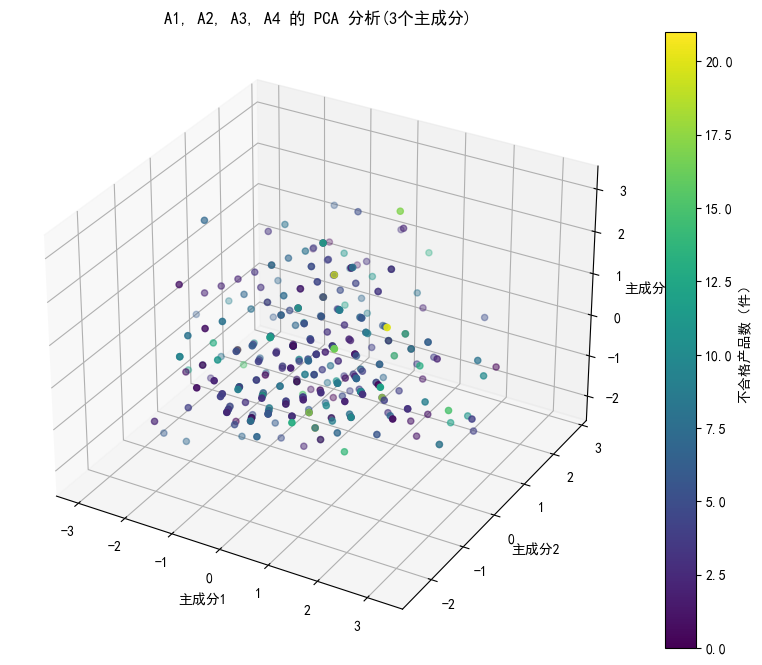

In [93]:
# 选择X和y
X = data3[['A1', 'A2', 'A3', 'A4']]
y = data3['不合格产品数（件）']

# 标准化特征数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 执行PCA，假设希望将特征减少到2个主成分
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
# 查看每个主成分的方差解释率
explained_variance_ratio = pca.explained_variance_ratio_
print("方差解释率（每个主成分）：", explained_variance_ratio)
print("总方差解释率：", explained_variance_ratio.sum())
# 查看特征的主成分载荷（即每个原始特征对主成分的贡献）
components = pca.components_
print("主成分载荷矩阵：\n", components)
# 将PCA结果转换为DataFrame
pca_df = pd.DataFrame(X_pca, columns=['主成分1', '主成分2', '主成分3'])
pca_df['不合格产品数（件）'] = y.values  # 添加目标变量列

# 显示前几行数据
print("PCA 转换后的数据：\n", pca_df.head())
# 可视化主成分1、主成分2和主成分3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['主成分1'], pca_df['主成分2'], pca_df['主成分3'],
                     c=pca_df['不合格产品数（件）'], cmap='viridis')
plt.colorbar(scatter, label='不合格产品数（件）')
ax.set_xlabel('主成分1')
ax.set_ylabel('主成分2')
ax.set_zlabel('主成分3')
plt.title('A1, A2, A3, A4 的 PCA 分析(3个主成分)')
plt.show()


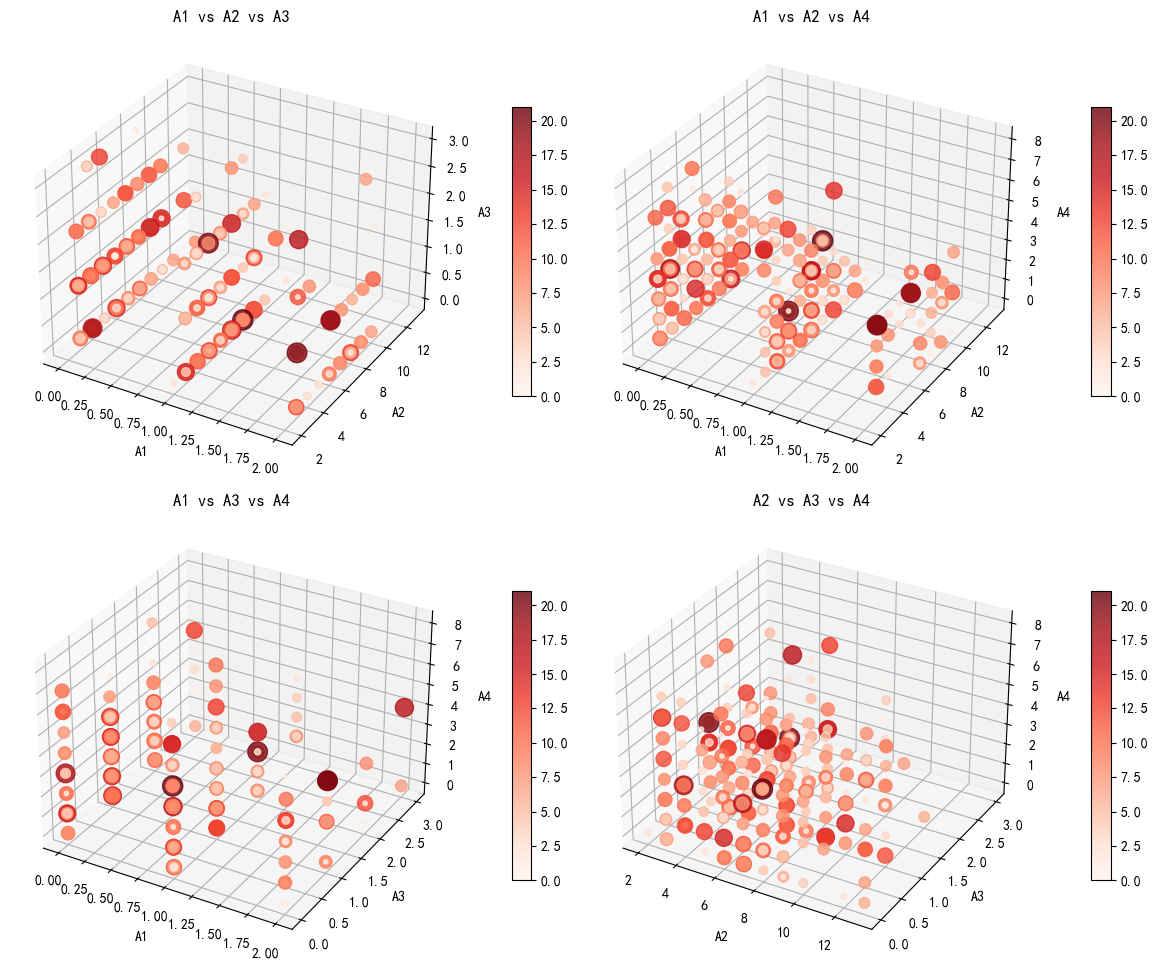

In [89]:
combinations = [
    ('A1', 'A2', 'A3'),
    ('A1', 'A2', 'A4'),
    ('A1', 'A3', 'A4'),
    ('A2', 'A3', 'A4')
]

fig, axs = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(12, 10))
axs = axs.ravel()
for i, (x, y, z) in enumerate(combinations):
    ax = axs[i]
    scatter = ax.scatter(
        data3[x], data3[y], data3[z], 
        c=data3['不合格产品数（件）'], cmap='Reds', 
        s=data3['不合格产品数（件）'] * 10, marker='o', alpha=0.8
    )
    
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.set_title(f'{x} vs {y} vs {z}')
    
    fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=15, pad=0.1)

plt.tight_layout()
plt.show()


In [106]:

# Define matrices X and Y
X = np.array(data3[['A1', 'A2', 'A3', 'A4']])  # Define X matrix nx4
Y = np.array(data3['不合格产品数（件）'].values)  # Define Y matrix nx1
X = scaler.fit_transform(X)
# Y = scaler.fit_transform(Y)
# 目标函数
def objective(W, X, Y):
    # 计算目标函数 f(W) = || W X^T - Y^T ||_2^2
    return np.linalg.norm(W @ X.T - Y.T)**2  # 使用 2 范数（欧几里得范数）

# 约束条件 W * ones(4) = 1
def constraint(W):
    ones = np.ones(4)  # 创建一个一维数组作为约束的 ones
    return np.dot(W, ones) - 1  # 返回约束的值，期望它等于 0

# 初始猜测，W的大小是 1 x 4
W0 = np.random.randn(4)  # 创建一个一维数组作为初始猜测

# 设置约束
cons = {'type': 'eq', 'fun': constraint}

# 使用 scipy.optimize.minimize 求解优化问题
result = minimize(objective, W0, args=(X, Y), constraints=cons, method='SLSQP')

# 输出最优解
W_optimal = result.x
print("最优解 W:", W_optimal)

# 验证 W 是否满足约束
print("W * ones(4) 是否接近 1:", np.allclose(W_optimal @ np.ones(4), 1))

最优解 W: [0.36946779 0.00636694 0.2358107  0.38835457]
W * ones(4) 是否接近 1: True


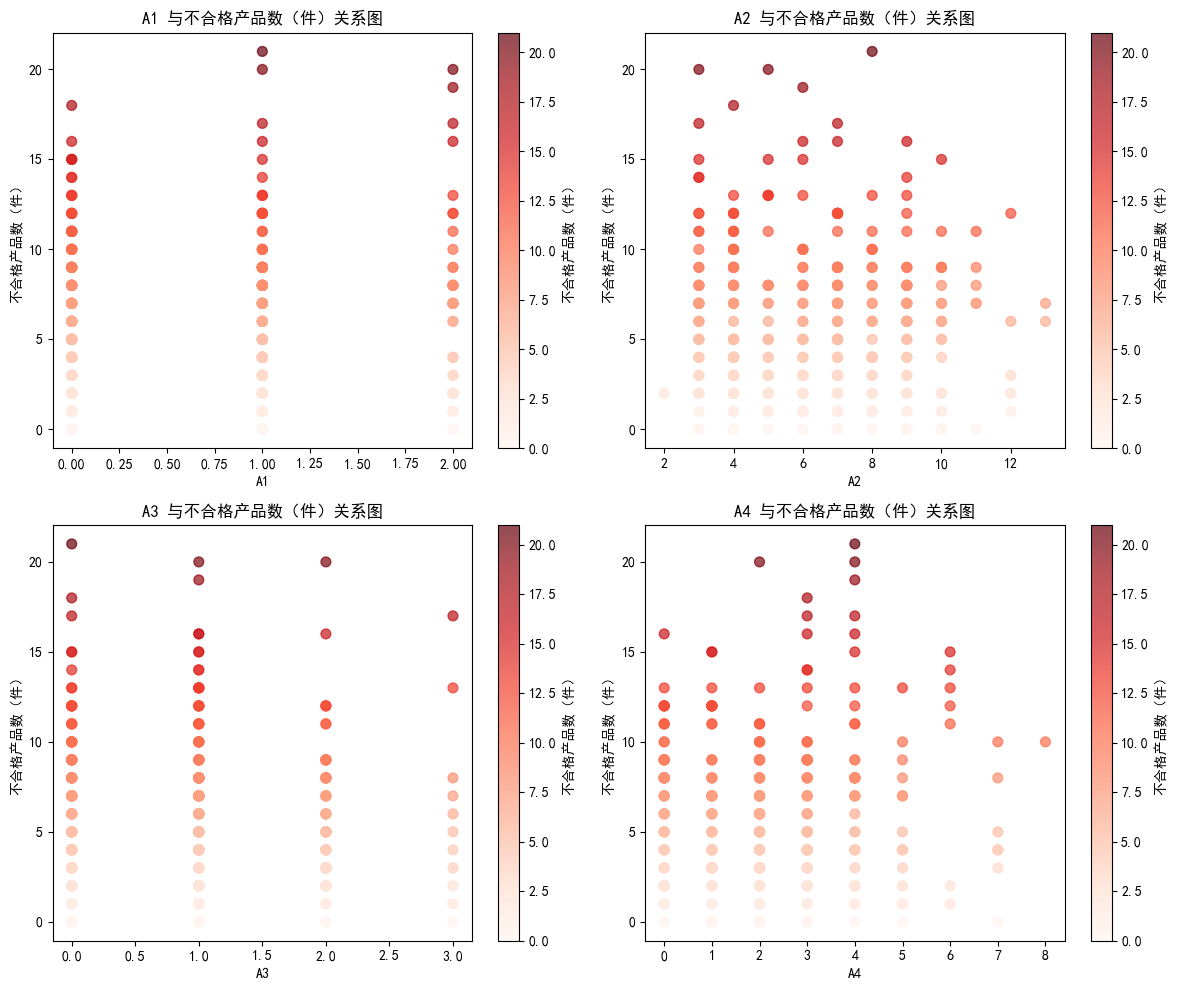

In [91]:
# 设置子图的布局
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 将二维数组的轴展平，便于迭代
axs = axs.ravel()

# 绘制每个 A 列与不合格产品数（件）的散点图
for i, col in enumerate(['A1', 'A2', 'A3', 'A4']):
    ax = axs[i]
    ax.scatter(data3[col], data3['不合格产品数（件）'], c=data3['不合格产品数（件）'], cmap='Reds', s=50, alpha=0.7)
    
    ax.set_xlabel(col)
    ax.set_ylabel('不合格产品数（件）')
    ax.set_title(f'{col} 与不合格产品数（件）关系图')
    
    cbar = fig.colorbar(ax.collections[0], ax=ax)
    cbar.set_label('不合格产品数（件）')

# 调整布局以防止重叠
plt.tight_layout()
plt.show()

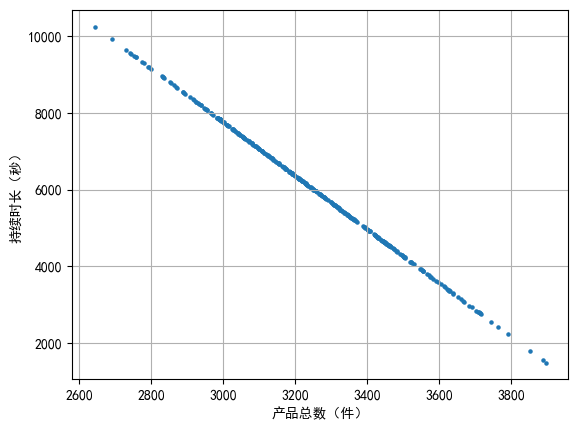

斜率: -6.9900584715325795
截距: 28728.953459612563
相关性系数 (r): -0.9999993217379985
p 值: 0.0
标准误差: 0.0004273084277064739


In [107]:
x = data3['产品总数（件）']
y = data3['持续时长（秒）']

plt.scatter(x, y, marker='o', s=5)

plt.xlabel("产品总数（件）")
plt.ylabel("持续时长（秒）")

plt.grid(True)
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"斜率: {slope}")
print(f"截距: {intercept}")
print(f"相关性系数 (r): {r_value}")
print(f"p 值: {p_value}")
print(f"标准误差: {std_err}")